#Data analysis of financial series

In [70]:
%matplotlib inline
from helpers.data import load_data
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.stattools as sm

In [ ]:
y, x = load_data('train.csv')

##Real financial series sample

In [19]:
sample = x[1]
y[1]

0

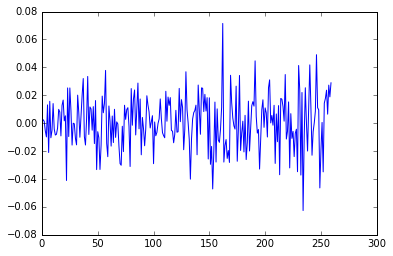

In [20]:
plt.plot(sample)
plt.show()

##Synthetic financial series sample

In [21]:
sample = x[2]
y[2]

1

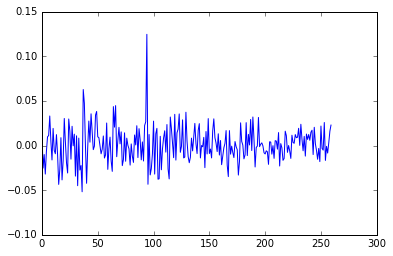

In [22]:
plt.plot(sample)
plt.show()

## Separate real from synthetic

In [48]:
syn_samples = x[np.nonzero(y)]
syn_samples.shape

(6000, 260)

In [47]:
real_samples = x[np.where(y == 0)[0]]
real_samples.shape

(6000, 260)

## Starting with the basics: Mean and standard deviation


In [84]:
def box_plots(real,syn):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))
    
    # Create an axes instance
    ax = fig.add_subplot(111)
    
    data = [real, syn]
    
    # Create the boxplot
    bp = ax.boxplot(data)
    
    plt.show()

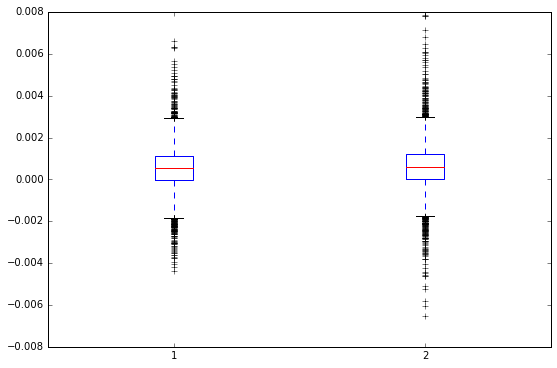

In [85]:
real_means = np.mean(real_samples, axis=1)
syn_means = np.mean(syn_samples, axis=1)
box_plots(real_means,syn_means)

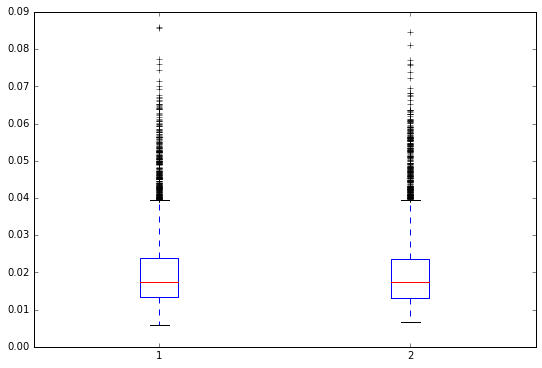

In [86]:
real_std = np.std(real_samples, axis=1)
syn_std = np.std(syn_samples, axis=1)
box_plots(real_std,syn_std)

##Max, min, difference max-min and corr

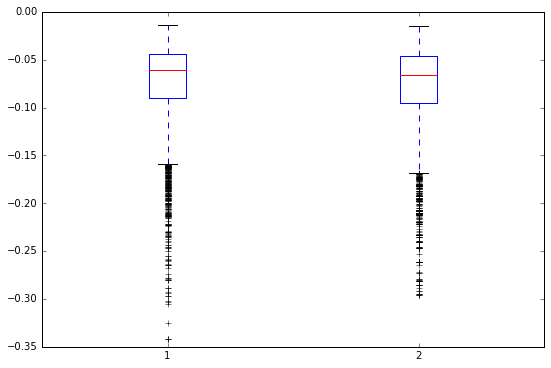

In [ ]:
real_max= np.apply_along_axis(np.max, 1, real_samples)
syn_max = np.apply_along_axis(np.max, 1, syn_samples)
box_plots(real_max, syn_max)

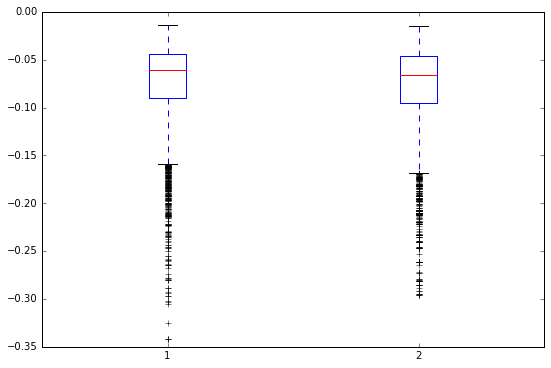

In [95]:
real_min = np.apply_along_axis(np.min, 1, real_samples)
syn_min = np.apply_along_axis(np.min, 1, syn_samples)
box_plots(real_min, syn_min)

In [ ]:
def diff_max_min(row):
    return np.max(row) - np.min(row)
    
real_diff_max_min = np.apply_along_axis(diff_max_min, 1, real_samples)
syn_diff_max_min = np.apply_along_axis(diff_max_min, 1, syn_samples)
box_plots(real_diff_max_min, syn_diff_max_min)

## Durbin-Watson statistic

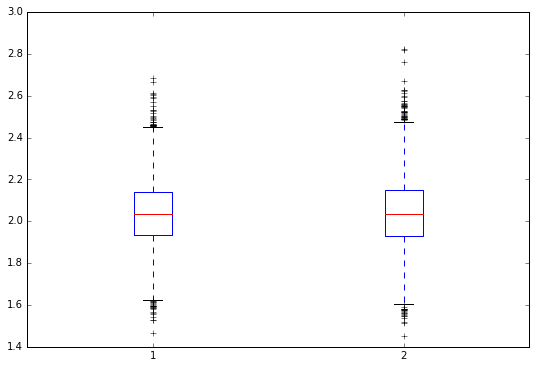

In [88]:
real_dw = np.apply_along_axis(sm.durbin_watson, 1, real_samples)
syn_dw = np.apply_along_axis(sm.durbin_watson, 1, syn_samples)
box_plots(real_dw, syn_dw)